In [1]:
import math
import numpy as np
import pylab as pl
import random as rm
import matplotlib.pyplot as plt
from sklearn import datasets

## Gráficas de pares

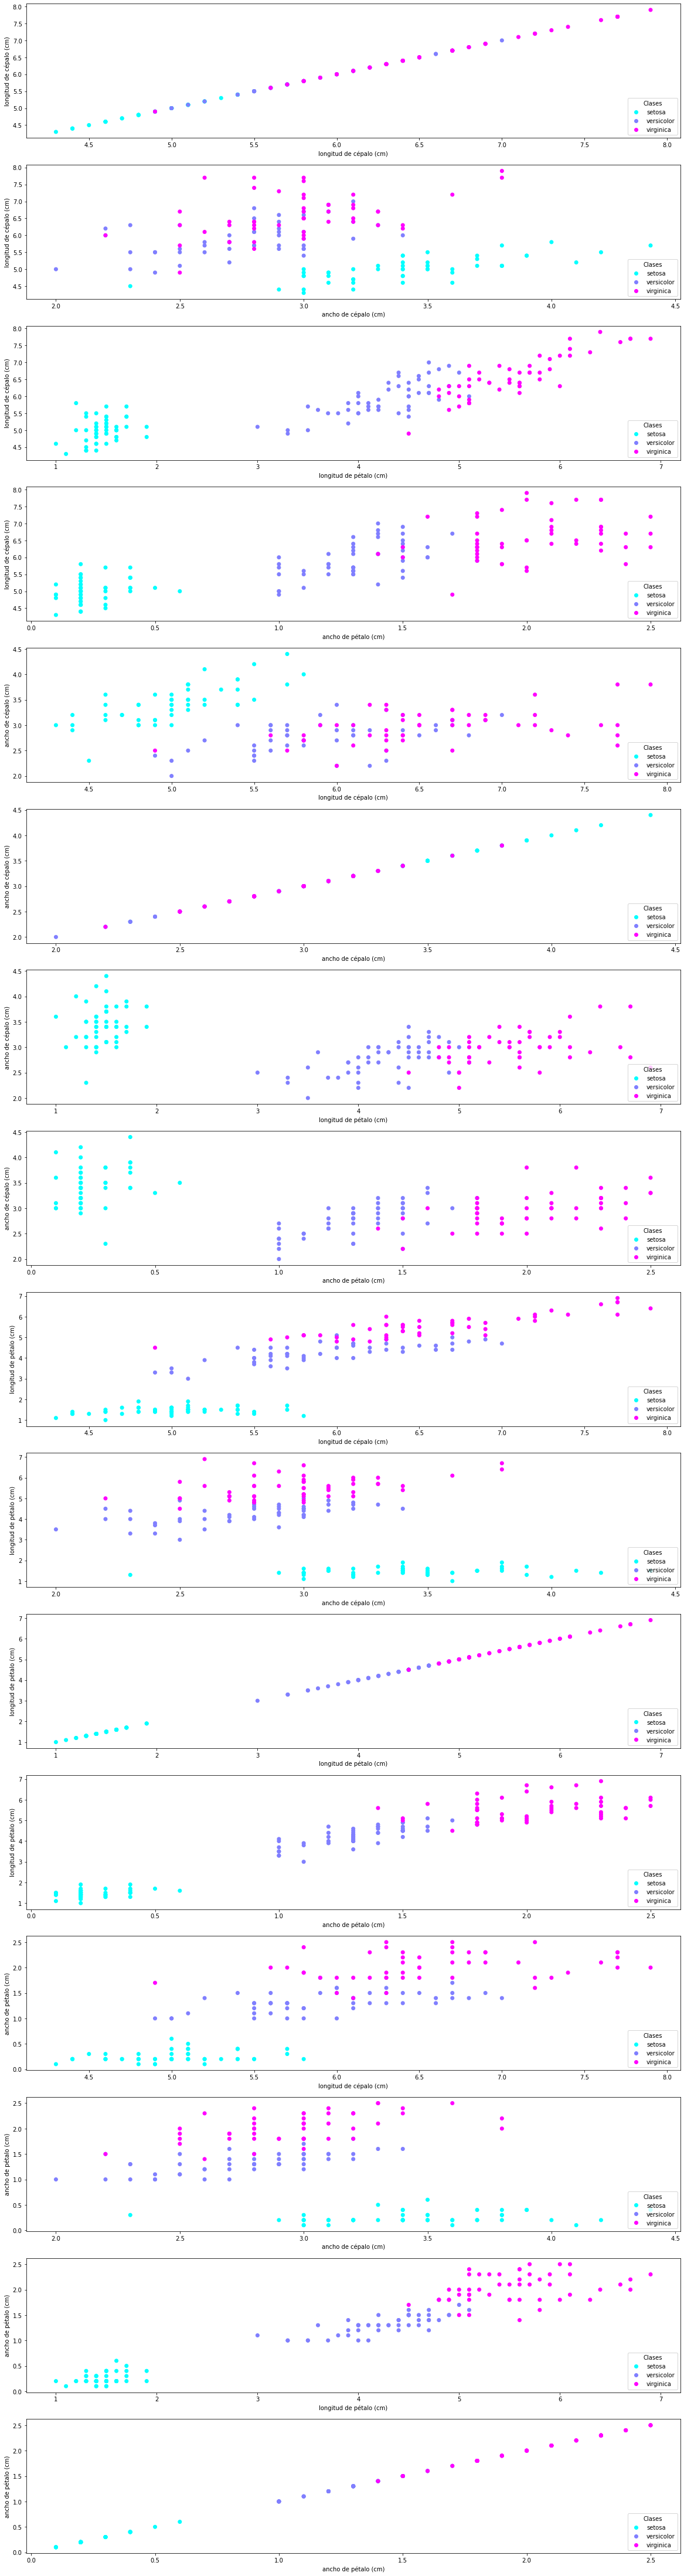

In [2]:
iris = datasets.load_iris()
iris_feature_names_spanish = ['longitud de cépalo (cm)','ancho de cépalo (cm)','longitud de pétalo (cm)','ancho de pétalo (cm)']
fig, ax = plt.subplots(16,1, figsize=(20,80))
for i in range(0,4):
    for j in range(0,4):
        aux=4*j+i
        scatter = ax[aux].scatter(iris.data[:, i], iris.data[:, j], c=iris.target, cmap='cool')
        ax[aux].set(xlabel=iris_feature_names_spanish[i], ylabel=iris_feature_names_spanish[j])
        fig = ax[aux].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Clases")

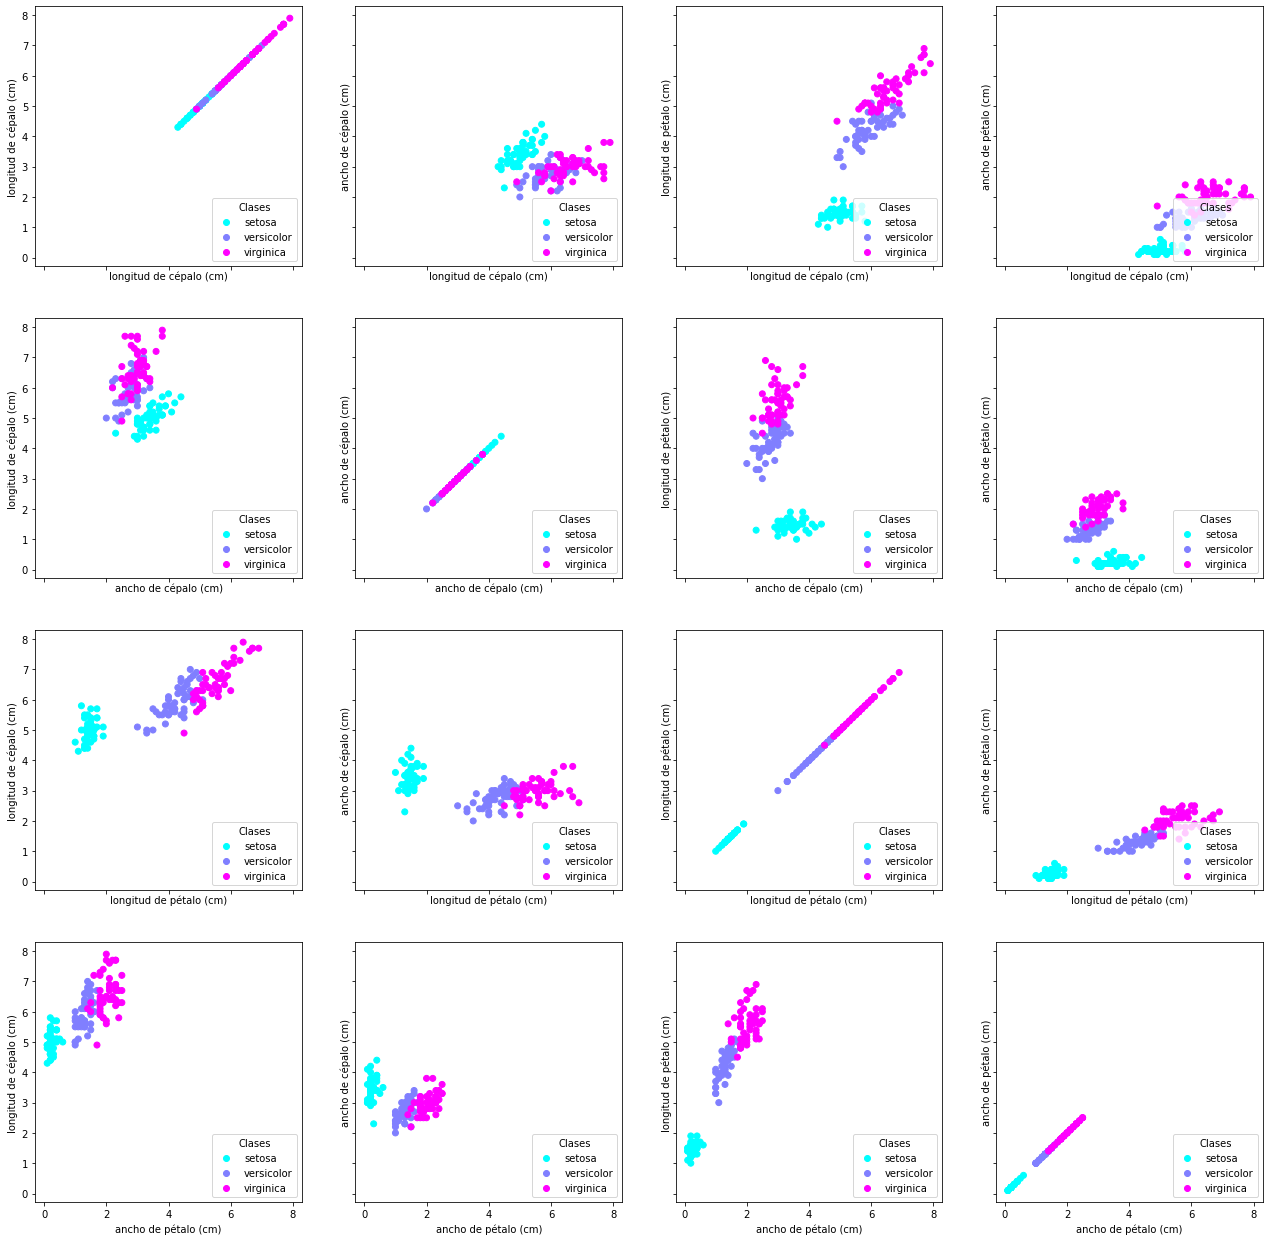

In [3]:
iris = datasets.load_iris()
iris_feature_names_spanish = ['longitud de cépalo (cm)','ancho de cépalo (cm)','longitud de pétalo (cm)','ancho de pétalo (cm)']
fig, ax = plt.subplots(4,4, sharex=True, sharey=True, figsize=(22,22))
for i in range(0,4):
    for j in range(0,4):
        scatter = ax[i,j].scatter(iris.data[:, i], iris.data[:, j], c=iris.target, cmap='cool')
        ax[i,j].set(xlabel=iris_feature_names_spanish[i], ylabel=iris_feature_names_spanish[j])
        fig = ax[i,j].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Clases")

## Training y Data Set

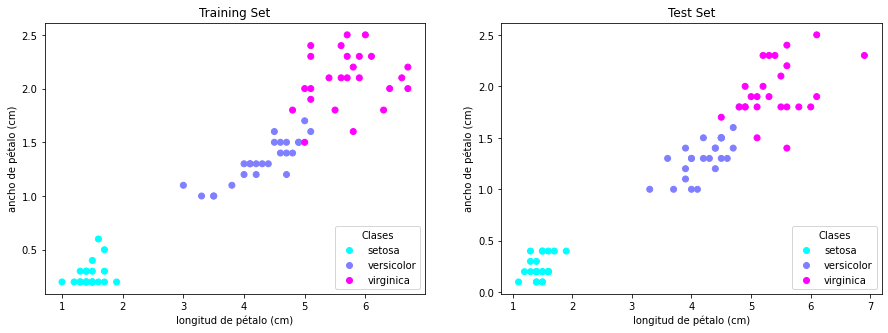

In [4]:
#separando indexes de datos
setosa_list = [x for x in range(0,50)]
versicolor_list = [x for x in range(50,100)]
virginica_list = [x for x in range(100,150)]

#funcion para mezclar los indexes de cada lista
def train_test_indexes(object_list):
    rm.shuffle(object_list)
    train_indexes=object_list[:25]
    test_indexes=object_list[25:]
    return train_indexes, test_indexes

def data_from_indexes(index_list):
    length_aux_list = [iris.data[x,2] for x in index_list]
    width_aux_list = [iris.data[x,3] for x in index_list]
    
    length_petal = np.array(length_aux_list)
    width_petal = np.array(width_aux_list)
    colors = np.array([iris.target[x] for x in index_list])
    return length_petal, width_petal, colors

iris = datasets.load_iris()
iris_feature_names_spanish = ['longitud de cépalo (cm)','ancho de cépalo (cm)','longitud de pétalo (cm)','ancho de pétalo (cm)']

#sacando train y test sets
train_set = []
test_set = []

train_aux, test_aux = train_test_indexes(setosa_list)
train_set+=train_aux
test_set+=test_aux

train_aux, test_aux = train_test_indexes(versicolor_list)
train_set+=train_aux
test_set+=test_aux

train_aux, test_aux = train_test_indexes(virginica_list)
train_set+=train_aux
test_set+=test_aux

train_set=sorted(train_set)
test_set=sorted(test_set)

length_petal, width_petal, colors = data_from_indexes(train_set)

fig, ax = plt.subplots(1,2, figsize=(15,5))
scatter = ax[0].scatter(length_petal, width_petal, c=colors, cmap='cool')
ax[0].set(xlabel=iris_feature_names_spanish[2], ylabel=iris_feature_names_spanish[3])
ax[0].set_title("Training Set")
fig = ax[0].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Clases")

length_petal, width_petal, colors = data_from_indexes(test_set)

scatter = ax[1].scatter(length_petal, width_petal, c=colors, cmap='cool')
ax[1].set(xlabel=iris_feature_names_spanish[2], ylabel=iris_feature_names_spanish[3])
ax[1].set_title("Test Set")
fig = ax[1].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Clases")

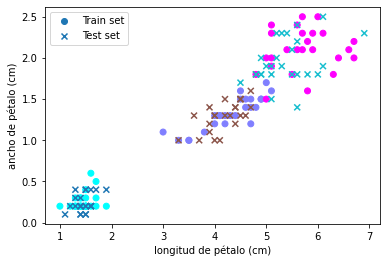

In [5]:
length_petal_train, width_petal_train, colors_train = data_from_indexes(train_set)
length_petal_test, width_petal_test, colors_test = data_from_indexes(test_set)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(length_petal_train, width_petal_train, c=colors_train, cmap='cool', label="Train set")
ax1.scatter(length_petal_test,width_petal_test, c=colors_test, cmap='tab10', marker='x', label="Test set")
ax1.set(xlabel=iris_feature_names_spanish[2], ylabel=iris_feature_names_spanish[3])
plt.legend(loc='upper left')
plt.show()

# Bayes Ingenuo

In [6]:
iris = datasets.load_iris()

# Obtener características y etiquetas para el conjunto de entrenamiento
length_petal_train, width_petal_train, colors_train = data_from_indexes(train_set)

# Calcular parámetros para cada clase y característica
def calculate_parameters(length_petal, width_petal, colors):
    parameters = {}
    for class_value in np.unique(colors):
        indices = np.where(colors == class_value)
        print(indices)
        parameters[class_value] = {
            'length_petal': {'mean': np.mean(length_petal[indices]), 'std': np.std(length_petal[indices])},
            'width_petal': {'mean': np.mean(width_petal[indices]), 'std': np.std(width_petal[indices])}
        }
    return parameters

parameters = calculate_parameters(length_petal_train, width_petal_train, colors_train)
parameters


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64),)
(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)
(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74], dtype=int64),)


{0: {'length_petal': {'mean': 1.46, 'std': 0.18110770276274835},
  'width_petal': {'mean': 0.256, 'std': 0.10229369482035536}},
 1: {'length_petal': {'mean': 4.295999999999999, 'std': 0.5422029140460239},
  'width_petal': {'mean': 1.328, 'std': 0.1929144888285999}},
 2: {'length_petal': {'mean': 5.703999999999999, 'std': 0.5436763743257564},
  'width_petal': {'mean': 2.092, 'std': 0.25599999999999995}}}

In [17]:

train_length_petal, train_width_petal, train_colors = data_from_indexes(train_set)
test_length_petal, test_width_petal, test_colors = data_from_indexes(test_set)

# Ahora, implementaremos el clasificador de Bayes Ingenuo

# Preparar datos de entrenamiento para el clasificador
train_data = np.column_stack((train_length_petal, train_width_petal))
train_labels = train_colors

# Calcular medias y desviaciones estándar para cada clase
class_stats = {}

for class_value in np.unique(train_labels):
    class_data = train_data[train_labels == class_value]
    class_stats[class_value] = {'mean': class_data.mean(axis=0), 'std': class_data.std(axis=0)}

# Función de densidad de probabilidad gaussiana
def gaussian_pdf(x, mean, std):
    return (1. / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

# Función para predecir la clase de una muestra
def predict(sample):
    probabilities = {}
    for class_value, stats in class_stats.items():
        probabilities[class_value] = 1
        for i in range(len(stats['mean'])):
            mean, std = stats['mean'][i], stats['std'][i]
            probabilities[class_value] *= gaussian_pdf(sample[i], mean, std)
    return max(probabilities, key=probabilities.get)

def predict2(sample):
    probabilities = {}
    for class_value, stats in class_stats.items():
        probabilities[class_value] = 1
        for i in range(len(stats['mean'])):
            mean, std = stats['mean'][i], stats['std'][i]
            probabilities[class_value] *= gaussian_pdf(sample[i], mean, std)
    return probabilities

# Predecir el conjunto de prueba
predictions = [predict(sample) for sample in np.column_stack((test_length_petal, test_width_petal))]
#Probabilidades de pertenencia del conjunto de prueba
probabilities = [predict2(sample) for sample in np.column_stack((test_length_petal, test_width_petal))]

# Calcular precisión
accuracy = np.mean(predictions == test_colors)
print("Garantia", accuracy)

Garantia 0.9466666666666667


# Gráficas de las gaussianas

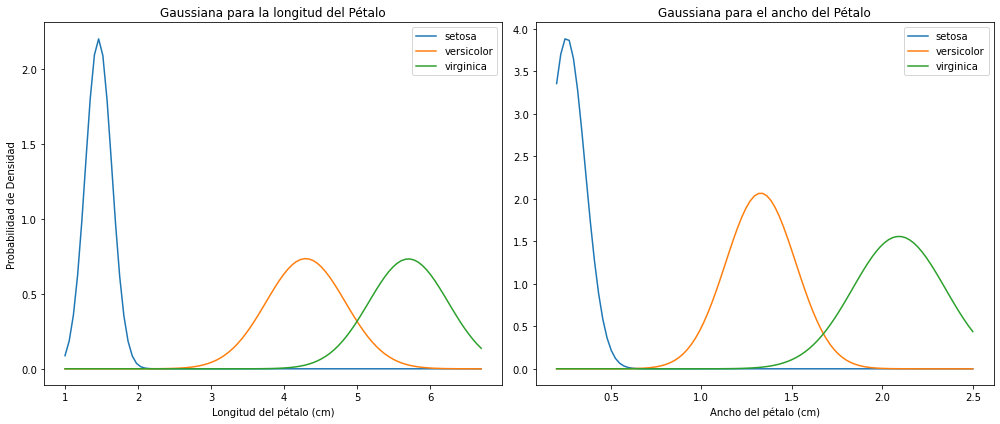

In [18]:
import matplotlib.pyplot as plt

# Definir el rango de valores para x (desde el mínimo hasta el máximo observado en los datos)
x_range_length = np.linspace(train_length_petal.min(), train_length_petal.max(), 100)
x_range_width = np.linspace(train_width_petal.min(), train_width_petal.max(), 100)

# Graficar las PDFs para la longitud del pétalo
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for class_value, stats in class_stats.items():
    plt.plot(x_range_length, gaussian_pdf(x_range_length, stats['mean'][0], stats['std'][0]), label=iris.target_names[class_value])
plt.title('Gaussiana para la longitud del Pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Probabilidad de Densidad')
plt.legend()

# Graficar las PDFs para el ancho del pétalo
plt.subplot(1, 2, 2)
for class_value, stats in class_stats.items():
    plt.plot(x_range_width, gaussian_pdf(x_range_width, stats['mean'][1], stats['std'][1]), label=iris.target_names[class_value])
plt.title('Gaussiana para el ancho del Pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.legend()

plt.tight_layout()
plt.show()


# Tablas de contingencia para cada caso y la curva ROC

In [19]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas en una configuración de Uno-contra-Todos
y_test_binarized = label_binarize(test_colors, classes=[0, 1, 2])
predictions_binarized = label_binarize(predictions, classes=[0, 1, 2])

# Calcular la matriz de confusión para cada clase
conf_matrices = {iris.target_names[i]: confusion_matrix(y_test_binarized[:, i], predictions_binarized[:, i]) for i in range(3)}

# Mostrar las matrices de confusión
conf_matrices


{'setosa': array([[50,  0],
        [ 0, 25]], dtype=int64),
 'versicolor': array([[47,  3],
        [ 1, 24]], dtype=int64),
 'virginica': array([[49,  1],
        [ 3, 22]], dtype=int64)}

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

# Asumiendo que 'test_colors' son las etiquetas reales y 'predictions' las etiquetas predichas
# Binarizamos las etiquetas para el enfoque Uno contra Todos
y_true_binarized = label_binarize(test_colors, classes=[0, 1, 2])
predictions_binarized = label_binarize(predictions, classes=[0, 1, 2])

# Calculamos la matriz de confusión para cada clase
confusion_matrices = [confusion_matrix(y_true_binarized[:, i], predictions_binarized[:, i]) for i in range(3)]

# Extraemos VP, FP, VN, FN para cada clase
for i, cm in enumerate(confusion_matrices):
    tn, fp, fn, tp = cm.ravel()
    print(f"Clase {iris.target_names[i]}:")
    print(f" Verdaderos Negativos (VN): {tn}")
    print(f" Falsos Positivos (FP): {fp}")
    print(f" Falsos Negativos (FN): {fn}")
    print(f" Verdaderos Positivos (VP): {tp}\n")


Clase setosa:
 Verdaderos Negativos (VN): 50
 Falsos Positivos (FP): 0
 Falsos Negativos (FN): 0
 Verdaderos Positivos (VP): 25

Clase versicolor:
 Verdaderos Negativos (VN): 47
 Falsos Positivos (FP): 3
 Falsos Negativos (FN): 1
 Verdaderos Positivos (VP): 24

Clase virginica:
 Verdaderos Negativos (VN): 49
 Falsos Positivos (FP): 1
 Falsos Negativos (FN): 3
 Verdaderos Positivos (VP): 22



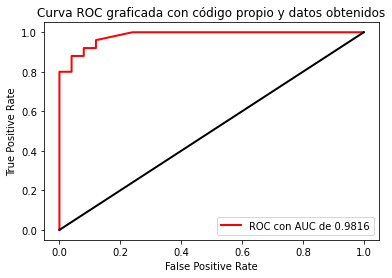

In [21]:
#ROC EN BASE A DATOS

from sklearn.preprocessing import label_binarize

def my_range(start, end, how_many):
    incr = float(end - start)/how_many
    return [start + i*incr for i in range(how_many)]

def perf_metrics(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

y_true_binarized = label_binarize(test_colors, classes=[1, 2])
predictions_binarized = label_binarize(predictions, classes=[1, 2])

probabilities_list = [probabilities[i][1] for i in range(25,len(y_true_binarized))]

thresholds = my_range(0, 1, 100)

aux = [y_true_binarized[i][0] for i in range(25,len(y_true_binarized))]

roc_points = []
for threshold in thresholds:
    rates = perf_metrics(aux, probabilities_list, threshold)
    roc_points.append(rates)
roc_points.append([0,0])

fpr_array_graph = [roc_points[i][0] for i in range(len(roc_points))]
tpr_array_graph = [roc_points[i][1] for i in range(len(roc_points))]

fpr_array = []
tpr_array=[]

for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])
    
auc = sum(np.trapz(tpr_array,fpr_array))+1

plt.plot(fpr_array_graph,tpr_array_graph, 'r', lw=2, label='ROC con AUC de %0.4f' % auc)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC graficada con código propio y datos obtenidos')
plt.legend(loc="lower right")
plt.show()

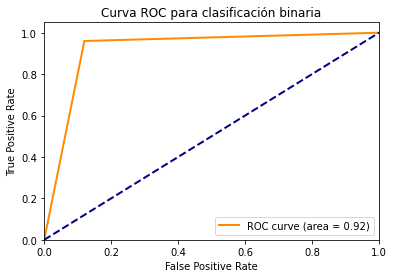

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

test = test_colors[25:]
prediction = predictions[25:]

for i in range(len(test)):
    if(test[i]==1):
        test[i] = 1
    else:
        test[i] = 0
    if(prediction[i]==1):
        prediction[i] = 1
    else:
        prediction[i] = 0


fpr, tpr, thresholds = roc_curve(test, prediction)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para clasificación binaria')
plt.legend(loc="lower right")
plt.show()